In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Objective: Determine the funding amount a start-up will get based on its categoy and country.

In [2]:
#Data from https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase?select=big_startup_secsees_dataset.csv
df = pd.read_csv('big_startup_secsees_dataset.csv')
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


We can replace the catergey null values to Other

In [3]:
df.drop_duplicates(subset='name' , keep = 'first')

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [4]:
df['category_list'] = df['category_list'].fillna('Other')
df['first_funding_at'] = df['first_funding_at'].fillna(df['last_funding_at'])
df['founded_at'] = df['founded_at'].fillna(df['first_funding_at'])
df['country_code'] = df['country_code'].fillna('Other')

Since all the funding total is given as a string we have to convert it into a float

In [5]:
df['funding_total_usd'].info

<bound method Series.info of 0        10000000
1          700000
2         3406878
3         2000000
4               -
           ...   
66363     1587301
66364      114304
66365           -
66366       18192
66367       14851
Name: funding_total_usd, Length: 66368, dtype: object>

In [6]:
def convert_to_Float(amount):
    if amount == '-':
        amount = np.nan 
    else:
        amount = float(amount)
    return amount

In [7]:
df['funding_total_usd'] = df['funding_total_usd'].apply(convert_to_Float)

In [8]:
df['category_list'] = df['category_list'].apply(lambda x: x.split('|')[0])
df['category_list'].unique 

<bound method Series.unique of 0                        Media
1        Application Platforms
2                         Apps
3                  Curated Web
4                     Software
                 ...          
66363      Enterprise Software
66364              Advertising
66365                    Other
66366     Consumer Electronics
66367           Consumer Goods
Name: category_list, Length: 66368, dtype: object>

In [9]:
df = df.dropna()

In [10]:
#Simplifying DataFrame into Important Data
df = df[['name','country_code','city','category_list','funding_total_usd','funding_rounds','founded_at','first_funding_at','last_funding_at','status']]

Visulization of the the catergories that appear the most 

In [11]:
category_counts = df['category_list']

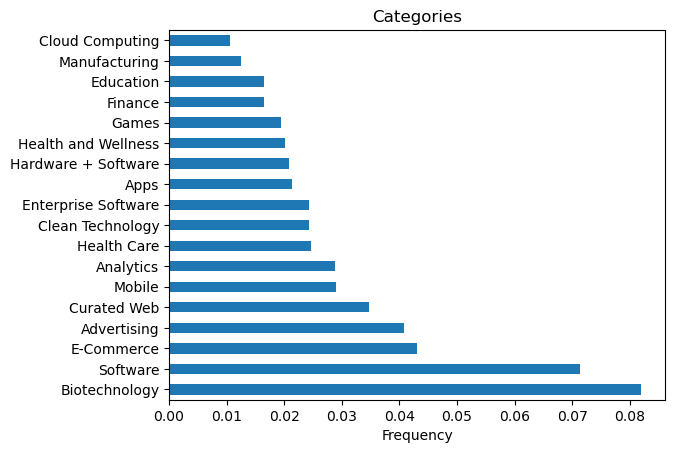

In [12]:
categories_norm = category_counts.value_counts(normalize=True)
catergory = categories_norm[categories_norm>0.01]
catergory.plot(kind='barh')
plt.title('Categories')
plt.xlabel('Frequency')
plt.show()

In [13]:
df['funding_total_usd'].max()

30079503000.0

In [14]:
df['last_funding_at'].isnull().sum()

0

In [15]:
status_category = []
for i in df['status']:
    if i in ['aquired','ipo']:
        status_category.append('sucess')
    elif i == 'closed':
        status_category.append('fail')
    else:
        status_category.append('operating')
df['status_category'] = status_category

In [16]:
df['year'] = df['founded_at'].apply(lambda x: x.split('-')[0])

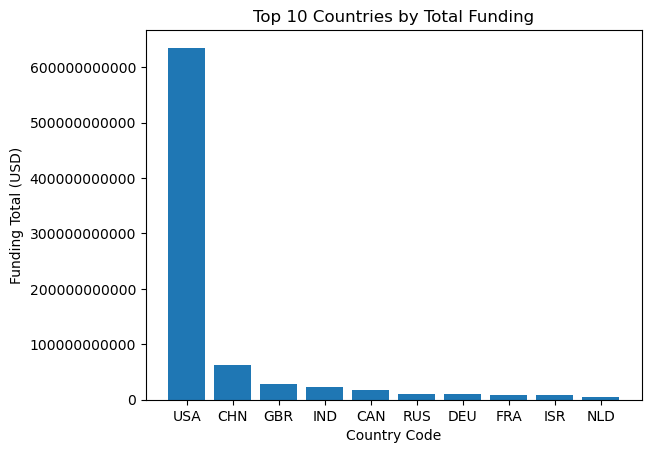

In [17]:
top_countries = 10
funding_country = df.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending = False)[:top_countries]
plt.bar(funding_country.index,funding_country.values,)
plt.xlabel('Country Code')
plt.ylabel('Funding Total (USD)')
plt.title(f'Top {top_countries} Countries by Total Funding')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

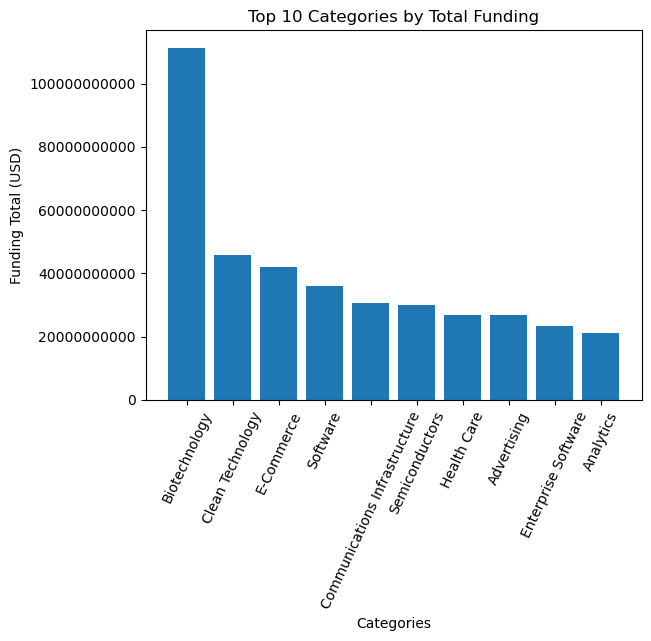

In [18]:
top_categories = 10
funding_categories = df.groupby('category_list')['funding_total_usd'].sum().sort_values(ascending = False)[:top_categories]
plt.bar(funding_categories.index,funding_categories.values,)
plt.xlabel('Categories')
plt.ylabel('Funding Total (USD)')
plt.title(f'Top {top_categories} Categories by Total Funding')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=65)
plt.show()

In [19]:
df

,name,country_code,city,category_list,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,status,status_category,year
0,#fame,IND,Mumbai,Media,10000000.0,1,2015-01-05,2015-01-05,2015-01-05,operating,operating,2015
1,:Qounter,USA,Delaware City,Application Platforms,700000.0,2,2014-09-04,2014-03-01,2014-10-14,operating,operating,2014
3,0-6.com,CHN,Beijing,Curated Web,2000000.0,1,2007-01-01,2008-03-19,2008-03-19,operating,operating,2007
6,Ondine Biomedical Inc.,CAN,Vancouver,Biotechnology,762851.0,2,1997-01-01,2009-09-11,2009-12-21,operating,operating,1997
7,H2O.ai,USA,Mountain View,Analytics,33600000.0,4,2011-01-01,2013-01-03,2015-11-09,operating,operating,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
66361,Zytoprotec,AUT,Gerasdorf Bei Wien,Biotechnology,2686600.0,1,2007-01-01,2013-01-29,2013-01-29,operating,operating,2007
66362,Zzish,GBR,London,Analytics,1120000.0,3,2014-01-28,2014-03-24,2015-02-25,operating,operating,2014
66363,ZZNode Science and Technology,CHN,Beijing,Enterprise Software,1587301.0,1,2012-04-01,2012-04-01,2012-04-01,operating,operating,2012
66364,Zzzzapp Wireless ltd.,HRV,Split,Advertising,114304.0,4,2012-05-13,2011-11-01,2014-03-01,operating,operating,2012


One-Hot Encoding for Categories

In [20]:
df = df.sample(1000)
encoder = OneHotEncoder()
encoded_data  = encoder.fit_transform(df[['category_list']])
encoder_df = pd.DataFrame(encoded_data.toarray())


feature_names = []
for category in encoder.categories_[0]:
    for col in ['category_list']:
        feature_name = f'{category}'
        feature_names.append(feature_name)

encoder_df.columns = feature_names

encoded_data  = encoder.fit_transform(df[['country_code']])
encoder_country= pd.DataFrame(encoded_data.toarray())

feature_names = []
for country in encoder.categories_[0]:
    for col in ['country_code']:
        feature_name = f'{country}'
        feature_names.append(feature_name)
encoder_country.columns = feature_names


        
        
encoded_df = pd.concat([encoder_country, encoder_df], axis=1)



In [21]:
X = encoded_df.values
y = df['funding_total_usd'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.3070370711860894e+42


In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

X = encoded_df.values
y = df['funding_total_usd'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVR(kernel='poly', C=100,degree = 5)

svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)



In [23]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3057430957136558.5
R-squared: -0.07249709375673574
